In [10]:
import pandas as pd 

df = pd.read_csv('./SelfData_thesis/0630_self8GData_3to7_ONU16.csv', usecols=[1])
#df.head()

In [11]:
maxAi = df['Gi'].max()
maxAi

195000

In [12]:
df['Gi'] = df['Gi'] / maxAi #手動正規化
#df['Ri'] = df['Ri'] / 1120017 #手動正規化
print(df[:20])

# 将dataframe 转化为 array
data = df.values

          Gi
0   0.005508
1   0.076231
2   0.076405
3   0.000000
4   0.000000
5   0.000000
6   0.000000
7   0.095579
8   0.036923
9   0.175349
10  0.078164
11  0.072903
12  0.110990
13  0.009636
14  0.027385
15  0.054344
16  0.057969
17  0.024149
18  0.055118
19  0.049708


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\joker\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [14]:
# 1 : 数据切分
result = []
time_steps = 65

for i in range(len(data)-time_steps):
    result.append(data[i:i+time_steps])

result = np.array(result)

In [15]:
# 训练集和测试集的数据量划分
train_size = int(0.8*len(result))

# 训练集切分
train = result[:train_size,:]

x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
   
x_test = result[train_size:,:-1]
y_test = result[train_size:,-1][:,-1]

feature_nums = len(df.columns)

# 数据重塑
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2])

print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

X_train (10668, 64, 1)
y_train (10668,)
X_test (2667, 64, 1)
y_test (2667,)


In [16]:
from __future__ import print_function
import math
#importing keras modules
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D , MaxPooling1D, Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#def build_model(input):
#    model = Sequential()
#    model.add(Dense(128,input_shape=(input[0],input[1])))
#    model.add(Conv1D(filters=80,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform"))
#    model.add(MaxPooling1D(pool_size=2,padding='valid'))
#    model.add(Conv1D(filters=48,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform"))
#    model.add(MaxPooling1D(pool_size=2, padding='valid'))
#    model.add(LSTM(32,return_sequences=True))
#    model.add(LSTM(16,return_sequences=False))
#    model.add(Dense(32, activation="relu", kernel_initializer="uniform"))
#    model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
#    model.compile(loss='mse',optimizer='adam',metrics=['mae'])
#    return model

timesteps_ = time_steps - 1
inputs = Input(shape=(timesteps_, ))
tgt1 = tf.keras.layers.Reshape((timesteps_, 1), input_shape=(timesteps_, ))(inputs)

tgt1 = Dense(units=32, input_shape=(timesteps_, 1))(tgt1)
#1st CNN Layer
tgt2 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(tgt1)
tgt3 = MaxPooling1D(pool_size=2,padding='valid')(tgt2)
#2nd CNN Layer
tgt4 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(tgt3)
tgt5 = MaxPooling1D(pool_size=2, padding='valid')(tgt4)

#tgt6 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(tgt5)
#tgt7 = MaxPooling1D(pool_size=2, padding='valid')(tgt6)
#1st LSTM Layer
#tgt6 = LSTM(32,return_sequences=True)(tgt5) #32
#tgt6_2 = LSTM(30,return_sequences=True)(tgt6) #32
#tgt6_3 = LSTM(22,return_sequences=True)(tgt6_2) #32
#tgt7 = LSTM(16,return_sequences=False)(tgt6) #16
#Dense
tgt6 = Flatten()(tgt5)
#tgt8 = Flatten()(tgt7)
#tgt7 = Dense(32, activation="relu", kernel_initializer="uniform")(tgt6)
predictions = Dense(1, activation="relu", kernel_initializer="uniform")(tgt6)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mae',optimizer='Adam',metrics=['mse','mae'])

In [17]:
#model = build_model([9,1,1]) #[x_train shape的第二個數字, x_train shape的第三個數字, 1]
#Summary of the Model
print(model.summary())

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 64, 1)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64, 32)            64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 64, 32)            1056      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 32, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 32, 32)            1056      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 16, 32)           

In [18]:
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=50,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

Epoch 1/50
134/134 - 0s - loss: 0.0447 - mse: 0.0095 - mae: 0.0447 - val_loss: 0.0406 - val_mse: 0.0082 - val_mae: 0.0406
Epoch 2/50
134/134 - 0s - loss: 0.0421 - mse: 0.0092 - mae: 0.0421 - val_loss: 0.0402 - val_mse: 0.0077 - val_mae: 0.0402
Epoch 3/50
134/134 - 0s - loss: 0.0416 - mse: 0.0092 - mae: 0.0416 - val_loss: 0.0397 - val_mse: 0.0082 - val_mae: 0.0397
Epoch 4/50
134/134 - 0s - loss: 0.0415 - mse: 0.0092 - mae: 0.0415 - val_loss: 0.0400 - val_mse: 0.0077 - val_mae: 0.0400
Epoch 5/50
134/134 - 0s - loss: 0.0413 - mse: 0.0092 - mae: 0.0413 - val_loss: 0.0392 - val_mse: 0.0078 - val_mae: 0.0392
Epoch 6/50
134/134 - 0s - loss: 0.0412 - mse: 0.0091 - mae: 0.0412 - val_loss: 0.0392 - val_mse: 0.0078 - val_mae: 0.0392
Epoch 7/50
134/134 - 0s - loss: 0.0412 - mse: 0.0091 - mae: 0.0412 - val_loss: 0.0391 - val_mse: 0.0080 - val_mae: 0.0391
Epoch 8/50
134/134 - 0s - loss: 0.0411 - mse: 0.0092 - mae: 0.0411 - val_loss: 0.0391 - val_mse: 0.0079 - val_mae: 0.0391
Epoch 9/50
134/134 - 0s 

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

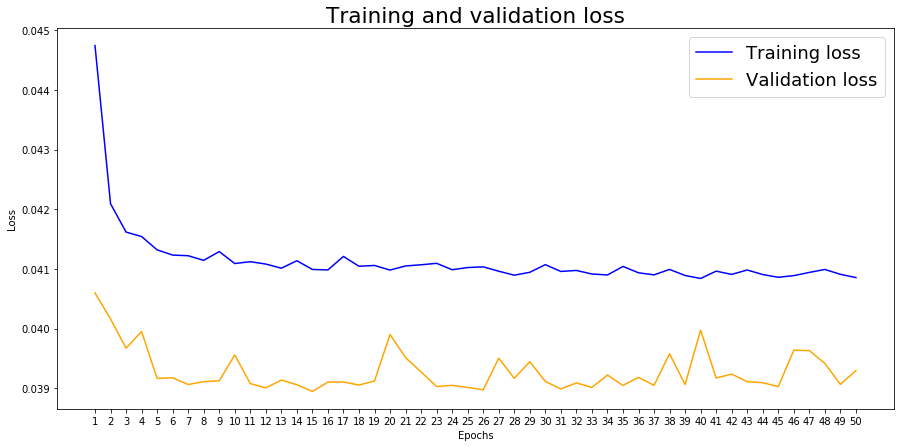

In [20]:
# 画出训练集和验证集的损失曲线

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='orange', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationlosscnn.png', dpi=300)
plt.show()

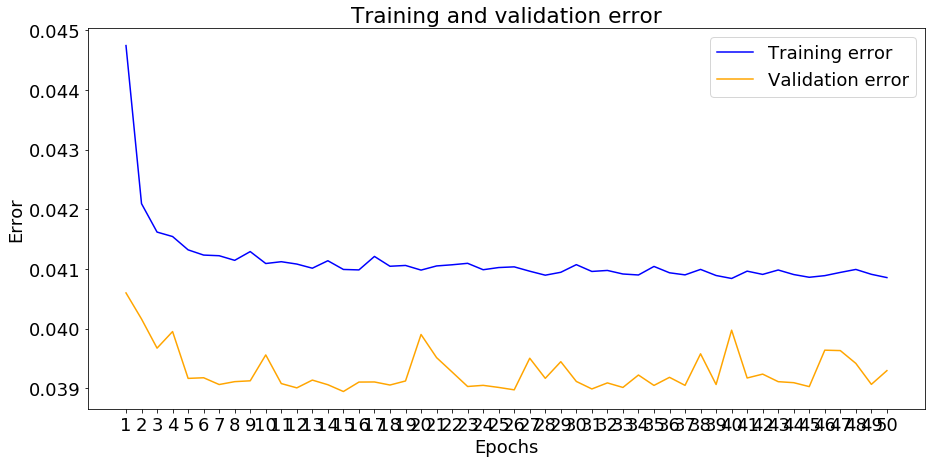

In [21]:
# 画出训练集和验证集的误差图像

#mae = history_dict['mean_absolute_error']
#vmae = history_dict['val_mean_absolute_error']
mae = history.history['mae']
vmae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='orange', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationerrorcnn.png', dpi=300)
plt.show()

In [22]:
model.metrics_names

['loss', 'mse', 'mae']

In [23]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
testScore = model.evaluate(x_test, y_test, verbose=0)

In [24]:
#predicting values for y_test
p = model.predict(x_test)

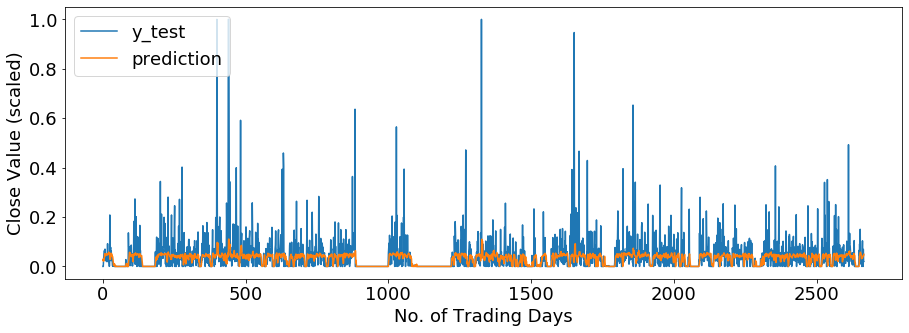

In [25]:
plt.plot(y_test, label='y_test')
plt.plot(p, label='prediction')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('img/tcstestcnn.png', dpi=300)
plt.show()

In [26]:
p1= model.predict(x_train)

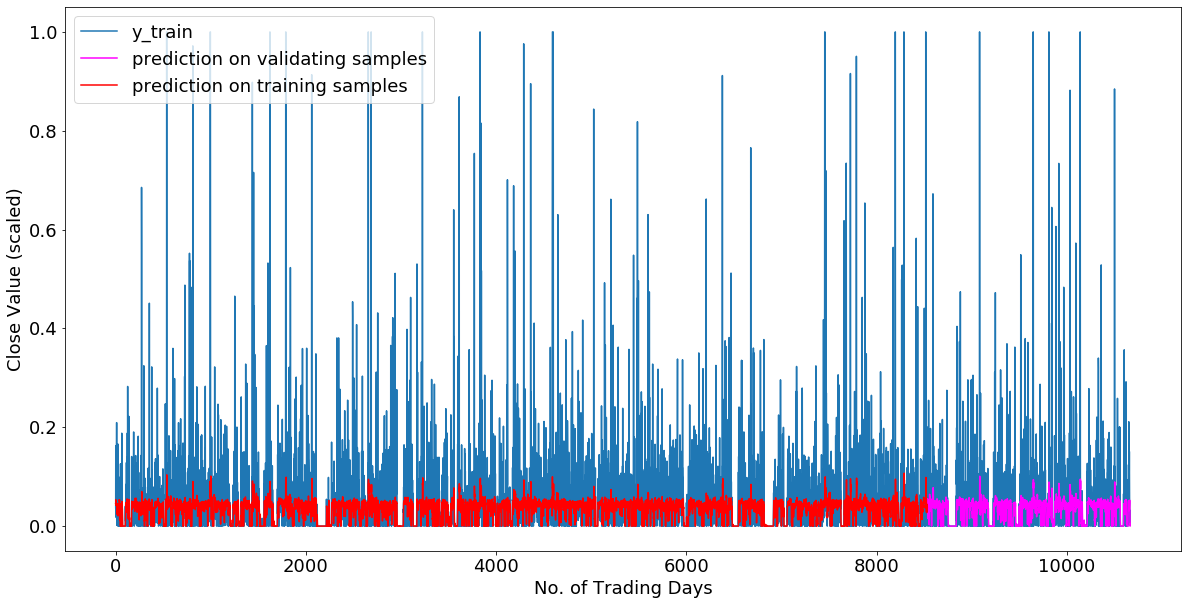

In [27]:
plt.plot(y_train, label='y_train')
x = np.array(range(8534,10668)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)
plt.plot(x,p1[8534:],color = 'magenta',label ='prediction on validating samples') #p1[數字:] 數字代表x_train shape第一個數字的0.8倍
plt.plot(p1[:8534],color='red', label='prediction on training samples')
#x = np.array(range(29512,36890)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)
#plt.plot(x,p1[29512:],color = 'magenta',label ='prediction on validating samples')
#plt.plot(y_train,color='blue', label='y_train')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
#fig.savefig('img/tcstraincnn.png', dpi=300)
plt.show()

In [28]:
#手動正規化
y = y_test * maxAi   # 原始数据经过除以10000进行缩放，因此乘以10000,返回到原始数据规模
y_pred = p.reshape(2667)  # 测试集数据大小为265
y_pred = y_pred * maxAi   # 原始数据经过除以10000进行缩放，因此乘以10000,返回到原始数据规模

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
0.201088786 		 0.008622297 		 0.185207780 		 0.005538607


In [31]:
print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))

mean absolute error 	 mean absolute percentage error
 6688.875429393 			 nan


C:\Users\joker\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\joker\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [32]:
Ytrain = y_train * maxAi
Ytest = y_test * maxAi

P1 = p1 * maxAi
PP = p * maxAi

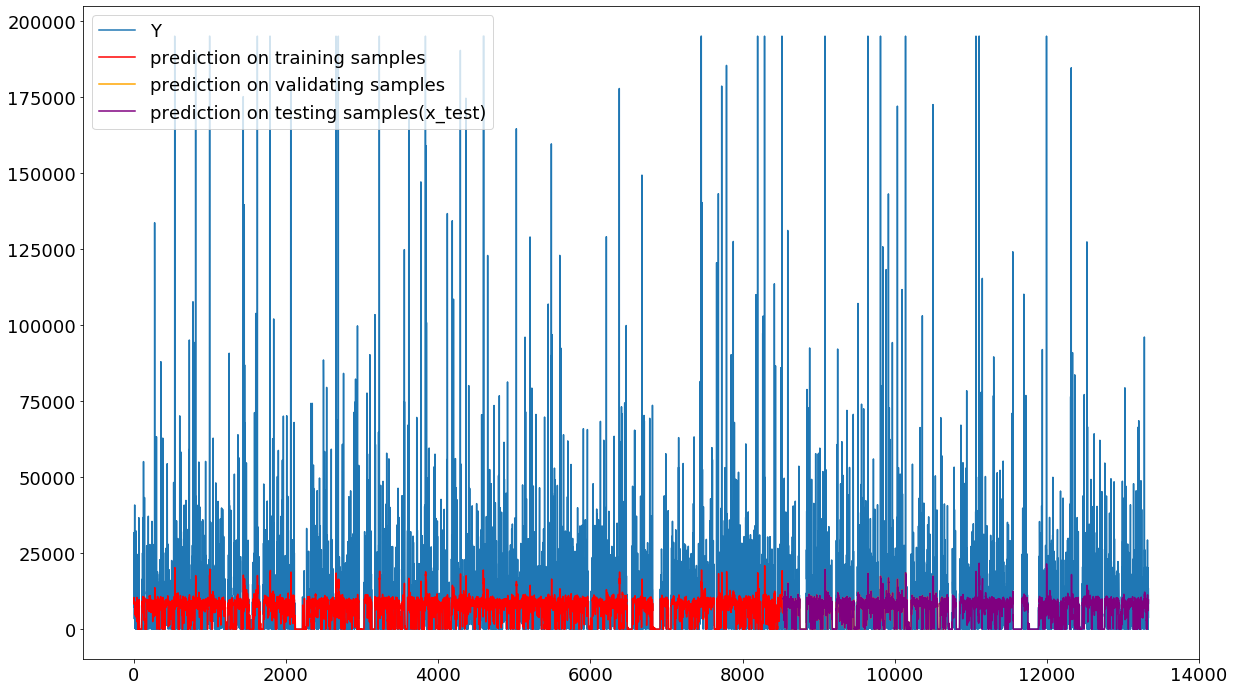

In [33]:
Y = np.concatenate((Ytrain,Ytest),axis = 0)
plt.plot(Y, label='Y')
P = np.concatenate((P1,PP),axis = 0)
#plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)
#for 
plt.plot(P[:8534],color='red', label='prediction on training samples') #p[:數字] 數字代表x_train shape第一個數字的0.8倍
#for validating samples
z = np.array(range(8534,10668)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)
plt.plot(z,P[8534:10668],color = 'orange',label ='prediction on validating samples') #P[x_train shape第一個數字的0.8倍:x_train shape第一個數字]
#for testing samples
x = np.array(range(8534,13335)) #range(x_train shape第一個數字, x_train shape第一個數字 + x_test shape第一個數字)
plt.plot(x,P[8534:],color = 'purple',label ='prediction on testing samples(x_test)') #p[數字:] 數字代表x_train shape第一個數字

#plt.plot(Y,color='blue', label='Y')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()

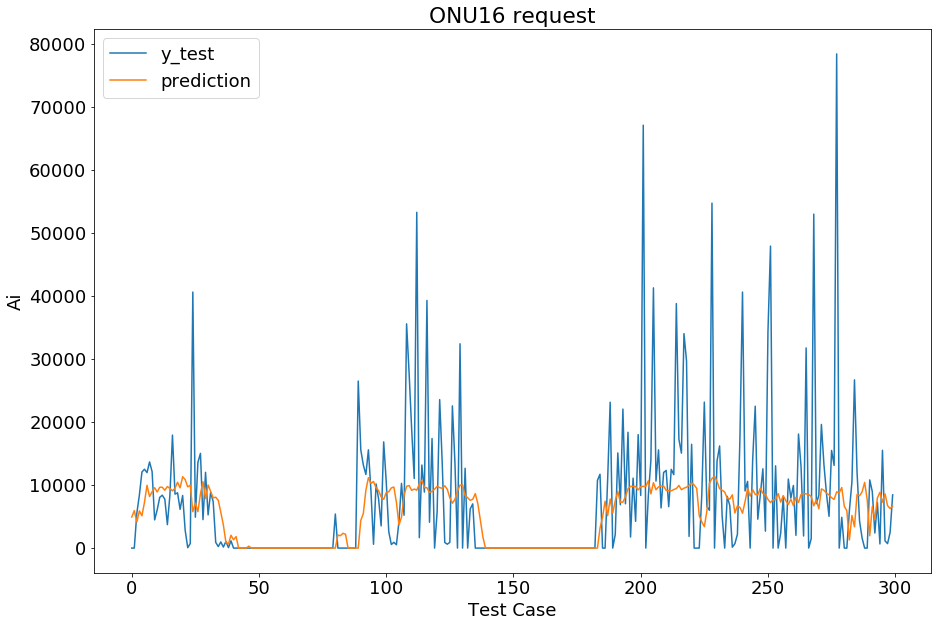

In [34]:
plt.plot(Ytest[:300], label='y_test')
plt.plot(PP[:300], label='prediction')
plt.title('ONU16 request')
plt.xlabel('Test Case')
plt.ylabel('Ai')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 10)
#fig.savefig('img/tcstestcnn.png', dpi=300)
plt.legend()
plt.show()

timesteps :  64


Text(0.5, 1.0, 'mae')

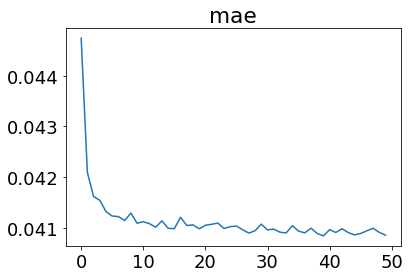

In [35]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mae'])
plt.title('mae')

timesteps :  64


Text(0.5, 1.0, 'mse')

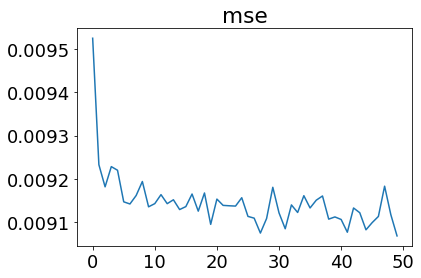

In [36]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mse'])
plt.title('mse')

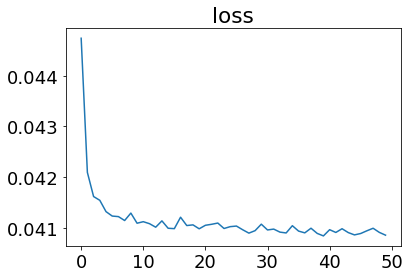

In [37]:
plt.title('loss')
plt.plot(history.history['loss'])

In [38]:
model.save('./SelfData_thesis/0630_U08D00_CNN_ONU16_onuAi_195000_2layer_timesteps64.h5', include_optimizer=False)